(2, 2)
(2, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

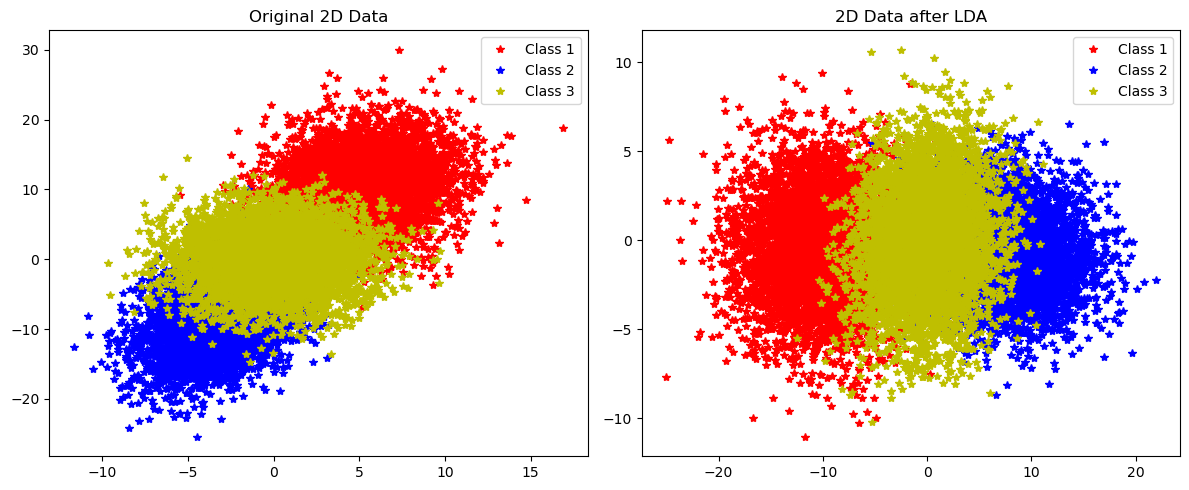

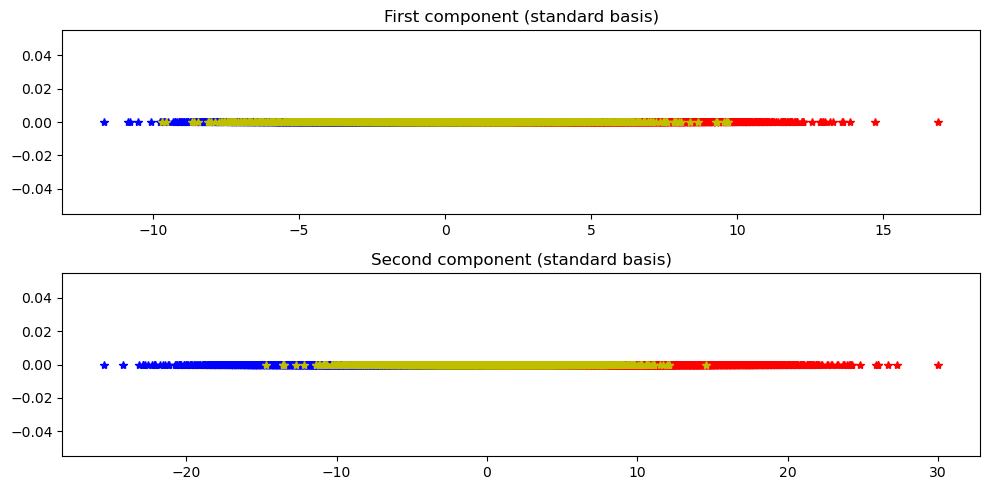

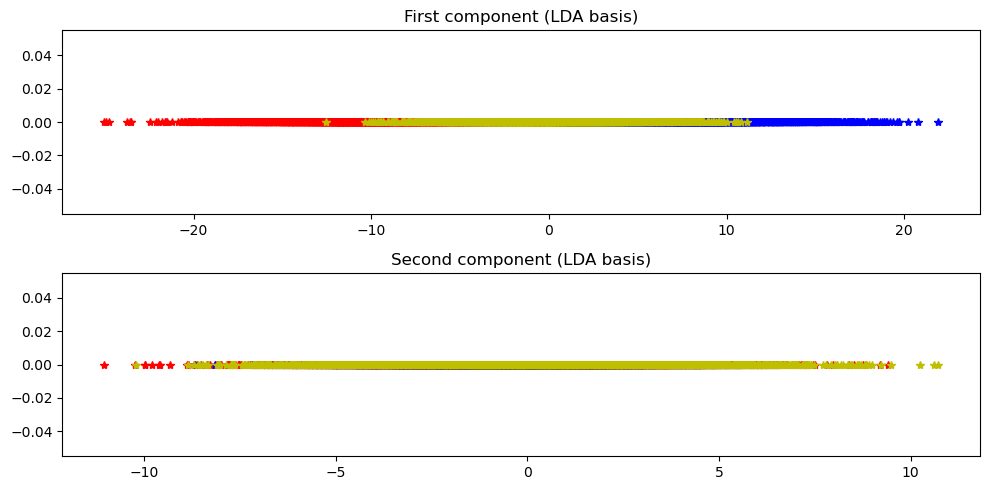

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig, inv, pinv


# Data Generation for Class 1
M1 = np.array([5,10])
CX1 = np.array([[0.9, 0.1], [0.3, 0.9]])
eigvals1, E1 = eig(CX1)
X = np.random.randn(2, 5000)*4
X1 = (E1 @ np.diag(np.sqrt(eigvals1)) @ X) + M1[:, np.newaxis]

# Data Generation for Class 2
M2 = np.array([-3, -8])
CX2 = np.array([[0.9, 0.1], [0.5, 0.8]])
eigvals2, E2 = eig(CX2)
X = np.random.randn(2, 5000)*4
X2 = (E2 @ np.diag(np.sqrt(eigvals2)) @ X) + M2[:, np.newaxis]

# Data Generation for Class 3
M3 = np.array([0,0])
CX3 = np.array([[0.6, 0.1], [0.2, 0.9]])
eigvals3, E3 = eig(CX3)
X = np.random.randn(2, 5000)*4
X3 = (E3 @ np.diag(np.sqrt(eigvals3)) @ X) + M3[:, np.newaxis]

# Calculation of exact and actual means
MEAN1 = np.mean(X1, axis=1)
MEAN2 = np.mean(X2, axis=1)
MEAN3 = np.mean(X3, axis=1)

# Construction of Between-class scatter matrix
C=(MEAN1+MEAN2+MEAN3)/3
M1 = MEAN1[:, np.newaxis]  # shape (2,1)
M2 = MEAN2[:, np.newaxis]
M3 = MEAN3[:, np.newaxis]
C = C[:, np.newaxis]       # shape (2,1)
SB= 500*(((M1-C) @ (M1-C).T) + ((M2-C) @ (M2-C).T) + ((M3-C) @ (M3-C).T))

# Construction of Within-class scatter matrix
SW = ((X1 - M1) @ (X1 - M1).T) + ((X2 - M2) @ (X2 - M2).T) + ((X3 - M3) @ (X3 - M3).T)
print(SB.shape)
print(SW.shape)
# Solving the LDA eigenvalue problem
eigvals, E = eig(pinv(SW) @ SB)

# Sorting the Eigvalues/vectors in descending order of magnitude
sorted_indices = np.argsort(eigvals)[::-1]
E = E[:, sorted_indices]
Y1 = E.T @ X1
Y2 = E.T @ X2
Y3= E.T @ X3

X=np.hstack([X1,X2,X3])
Y=np.hstack([Y1,Y2,Y3])

# Plot of Dataset in original v/s Transformed LDA Basis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X1[0], X1[1], 'r*', label='Class 1')
plt.plot(X2[0], X2[1], 'b*', label='Class 2')
plt.plot(X3[0], X3[1], 'y*', label='Class 3')
plt.title('Original 2D Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Y1[0], Y1[1], 'r*', label='Class 1')
plt.plot(Y2[0], Y2[1], 'b*', label='Class 2')
plt.plot(Y3[0], Y3[1], 'y*', label='Class 3')
plt.title('2D Data after LDA')
plt.legend()
plt.tight_layout()
plt.savefig("Figure 1_LDA.png")

# Dataset projected on its 2 original features
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(X1[0], np.zeros_like(X1[0]), 'r*')
plt.plot(X2[0], np.zeros_like(X2[0]), 'b*')
plt.plot(X3[0], np.zeros_like(X3[0]), 'y*')
plt.title('First component (standard basis)')


plt.subplot(2, 1, 2)
plt.plot(X1[1], np.zeros_like(X1[1]), 'r*')
plt.plot(X2[1], np.zeros_like(X2[1]), 'b*')
plt.plot(X3[1], np.zeros_like(X3[1]), 'y*')
plt.title('Second component (standard basis)')
plt.tight_layout()
plt.savefig("Figure 2_LDA.png")

# Figure 3: Dataset projected on its Eigen features
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

ax[0].plot(Y1[0], np.zeros_like(Y1[0]), 'r*')
ax[0].plot(Y2[0], np.zeros_like(Y2[0]), 'b*')
ax[0].plot(Y3[0], np.zeros_like(Y3[0]), 'y*')
ax[0].set_title('First component (LDA basis)')

ax[1].plot(Y1[1], np.zeros_like(Y1[1]), 'r*')
ax[1].plot(Y2[1], np.zeros_like(Y2[1]), 'b*')
ax[1].plot(Y3[1], np.zeros_like(Y3[1]), 'y*')
ax[1].set_title('Second component (LDA basis)')

fig.tight_layout()
fig.savefig("Figure 3_LDA.png")  
plt.show




# Figure 3: Dataset projected on its Eigen features
